<a href="https://colab.research.google.com/github/Marlrero/AI_PrimaryEducation/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Keras DNN으로 심장병 판별

#### 1. import package & set hyperparameter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix

In [2]:
# Hyperparameters
INPUT_DIM = 13
MY_SPLIT = 0.7
MY_HIDDEN = 500
MY_EPOCH = 1000

In [3]:
# 추가 옵션 설정
pd.set_option('display.max_columns', None)
np.random.seed(111) # 랜덤을 동일하게 유지하기 위함
sns.set(font_scale=1.5)

#### 2. load dataset & data preprocessing

In [4]:
raw = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')


샘플 10개
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2 

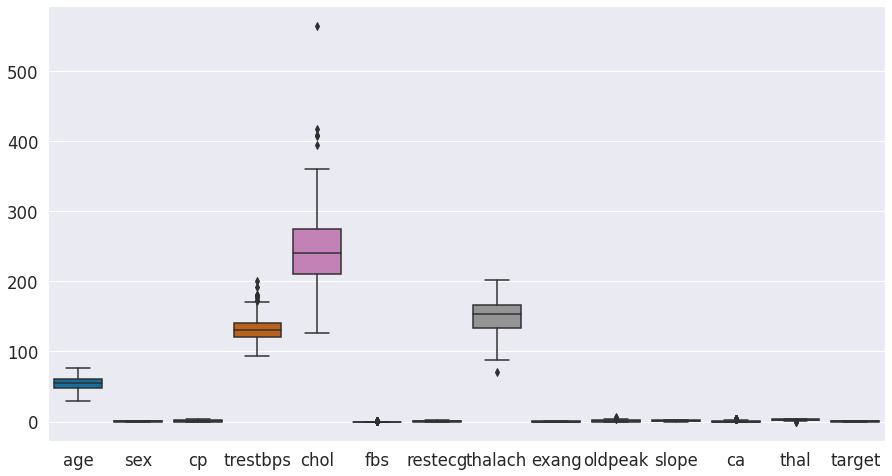

In [5]:
# 샘플 내용 확인 함수
def show_sample(data):
  print("\n샘플 10개")
  print(data.head(10))

  print('\n샘플 통계')
  print(data.describe())

  print('\nBoxplot 출력')
  plt.figure(figsize=(15, 8)) # figure size
  sns.boxplot(data=data, palette='colorblind')
  plt.show()

show_sample(raw)

In [6]:
# 데이터를 입력과 출력으로 분리
X_data = raw.drop('target', axis=1)
Y_data = raw['target']
names = X_data.columns


샘플 10개
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
5  0.290464  0.681005 -0.938515  0.478391 -1.048678 -0.417635  0.898962   
6  0.180175 -1.468418  0.032031  0.478391  0.922521 -0.417635 -1.005832   
7 -1.143291  0.681005  0.032031 -0.663867  0.323431 -0.417635  0.898962   
8 -0.260980  0.681005  1.002577  2.306004 -0.913400  2.394438  0.898962   
9  0.290464  0.681005  1.002577  1.049520 -1.512490 -0.417635  0.898962   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  
1  1.633471 -0.696631  2.122573 -2.274

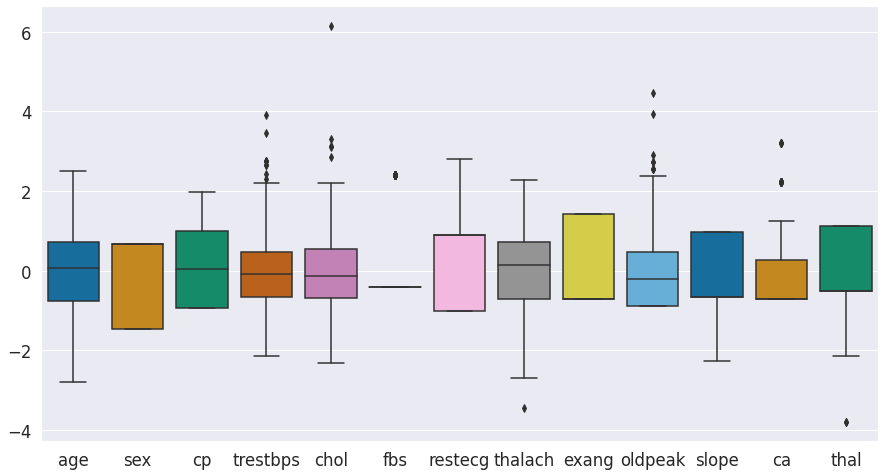

In [7]:
# Z-점수 정규화
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

# numpy -> pandas.dataframe
X_data = pd.DataFrame(X_data, columns=names)
show_sample(X_data)

In [8]:
# 훈련 데이터와 테스트 데이터 나누기
# shuffle=True: 섞음
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, 
                                                    train_size=MY_SPLIT, shuffle=True)

print("Train set:", X_train.shape)
print("Train label set:", Y_train.shape)
print("Test set:", X_test.shape)
print("Test label set:", Y_test.shape)

Train set: (212, 13)
Train label set: (212,)
Test set: (91, 13)
Test label set: (91,)


#### 3. DNN model

In [9]:
model = Sequential(name='DNN')
# units 파라미터는 생략 가능
model.add(Dense(name='1', units=MY_HIDDEN, input_dim=INPUT_DIM, activation='tanh'))
model.add(Dense(name='2', units=MY_HIDDEN, activation='tanh'))
model.add(Dense(name='output', units=1, activation='sigmoid'))
model.summary()

Model: "DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1 (Dense)                    (None, 500)               7000      
_________________________________________________________________
2 (Dense)                    (None, 500)               250500    
_________________________________________________________________
output (Dense)               (None, 1)                 501       
Total params: 258,001
Trainable params: 258,001
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

begin = time()
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, verbose=0)
end = time()
print("Learning time: {:.2f}sec".format(end - begin))

Learning time: 14.73sec


#### 4. Model evaluating

In [11]:
score = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Total loss:", score[0])
print("Accuracy:", score[1])

Total loss: 1.116501808166504
Accuracy: 0.8461538553237915


#### 5. Model prediction

In [12]:
pred = model.predict(X_test)
print(pred) # 확률이 나옴. ~%의 확률로 True, False -> 너무 낮은 확률이면 False
pred = (pred > 0.5) # 추측값을 이진수로 전환 (Binary이므로)
print('Predicted value:', pred.flatten())
print('Truth:', np.array(Y_test, dtype=np.bool))

[[9.9980551e-01]
 [1.0000000e+00]
 [4.8830720e-05]
 [9.9409866e-01]
 [9.9980015e-01]
 [1.0000000e+00]
 [8.6783366e-05]
 [1.0000000e+00]
 [3.2231455e-13]
 [9.9994683e-01]
 [9.9986410e-01]
 [9.9999893e-01]
 [1.0000000e+00]
 [9.9999821e-01]
 [4.3766174e-01]
 [8.1549418e-01]
 [9.9969876e-01]
 [1.4105271e-01]
 [1.0000000e+00]
 [9.9999845e-01]
 [1.0000000e+00]
 [6.0301943e-08]
 [1.3956584e-01]
 [2.2258902e-01]
 [9.9999940e-01]
 [2.9971098e-08]
 [9.9981731e-01]
 [7.8308773e-01]
 [9.9041969e-01]
 [3.4149230e-01]
 [3.4969676e-02]
 [8.0599552e-01]
 [9.9997890e-01]
 [9.3538366e-02]
 [9.9999988e-01]
 [1.0000000e+00]
 [1.1712818e-06]
 [5.7764515e-02]
 [3.3822907e-08]
 [2.5627897e-13]
 [6.9519694e-13]
 [2.3645974e-10]
 [4.5288098e-09]
 [9.9983990e-01]
 [9.9984944e-01]
 [1.0000000e+00]
 [3.7268284e-01]
 [9.9145848e-01]
 [9.9999702e-01]
 [9.9999845e-01]
 [2.4142432e-07]
 [5.3204126e-06]
 [1.0000000e+00]
 [3.8696539e-01]
 [9.9985576e-01]
 [9.3283540e-01]
 [9.9999166e-01]
 [9.9999952e-01]
 [6.8860544e-0

In [13]:
confusion_matrix(y_true=Y_test, y_pred=pred)

array([[29,  7],
       [ 7, 48]])

In [14]:
tn, fp, fn, tp = confusion_matrix(y_true=Y_test, y_pred=pred).ravel()
print(tn, fp, fn, tp)

acc = (tp + tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = (2 * precision * recall) / (precision + recall)
print("Accuarcy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

29 7 7 48
Accuarcy: 0.8461538461538461
Precision: 0.8727272727272727
Recall: 0.8727272727272727
F1-score: 0.8727272727272727


In [15]:
print(f1_score(y_true=Y_test, y_pred=pred, average='micro'))

0.8461538461538461


#### 실습문제

In [16]:
raw = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

X_data = raw.drop('target', axis=1)
Y_data = raw['target']
names = X_data.columns

# Z-점수 정규화
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

# numpy -> pandas.dataframe
X_data = pd.DataFrame(X_data, columns=names)

# 훈련 데이터와 테스트 데이터 나누기
# shuffle=True: 섞음
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, 
                                                    train_size=MY_SPLIT, shuffle=True)

model = Sequential(name='DNN_2')
# units 파라미터는 생략 가능
model.add(Dense(name='DNN_2_1', units=MY_HIDDEN, input_dim=INPUT_DIM, activation='tanh'))
model.add(Dense(name='DNN_2_2', units=MY_HIDDEN, activation='tanh'))
model.add(Dense(name='DNN_2_output', units=1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) # RMSprop

begin = time()
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, verbose=0)
end = time()
print("Learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Total loss:", score[0])
print("Accuracy:", score[1])

pred = model.predict(X_test)
pred = (pred > 0.5) # 추측값을 이진수로 전환 (Binary이므로)
tn, fp, fn, tp = confusion_matrix(y_true=Y_test, y_pred=pred).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)
print(f1_score(y_true=Y_test, y_pred=pred, average='micro'))

Model: "DNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DNN_2_1 (Dense)              (None, 500)               7000      
_________________________________________________________________
DNN_2_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
DNN_2_output (Dense)         (None, 1)                 501       
Total params: 258,001
Trainable params: 258,001
Non-trainable params: 0
_________________________________________________________________
Learning time: 16.42sec
Total loss: 4.5413126945495605
Accuracy: 0.7142857313156128
tn, fp, fn, tp: 27 13 13 38
0.7142857142857143


In [17]:
MY_HIDDEN = 5000

raw = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

X_data = raw.drop('target', axis=1)
Y_data = raw['target']
names = X_data.columns

# Z-점수 정규화
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

# numpy -> pandas.dataframe
X_data = pd.DataFrame(X_data, columns=names)

# 훈련 데이터와 테스트 데이터 나누기
# shuffle=True: 섞음
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, 
                                                    train_size=MY_SPLIT, shuffle=True)

model = Sequential(name='DNN_3')
# units 파라미터는 생략 가능
model.add(Dense(name='DNN_3_1', units=MY_HIDDEN, input_dim=INPUT_DIM, activation='tanh'))
model.add(Dense(name='DNN_3_2', units=MY_HIDDEN, activation='tanh'))
model.add(Dense(name='DNN_3_output', units=1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

begin = time()
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, verbose=0)
end = time()
print("Learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Total loss:", score[0])
print("Accuracy:", score[1])

pred = model.predict(X_test)
pred = (pred > 0.5) # 추측값을 이진수로 전환 (Binary이므로)
tn, fp, fn, tp = confusion_matrix(y_true=Y_test, y_pred=pred).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)
print(f1_score(y_true=Y_test, y_pred=pred, average='micro'))

MY_HIDDEN = 500 # 원래대로 되돌리기

Model: "DNN_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DNN_3_1 (Dense)              (None, 5000)              70000     
_________________________________________________________________
DNN_3_2 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
DNN_3_output (Dense)         (None, 1)                 5001      
Total params: 25,080,001
Trainable params: 25,080,001
Non-trainable params: 0
_________________________________________________________________
Learning time: 44.74sec
Total loss: 2.2992610931396484
Accuracy: 0.7692307829856873
tn, fp, fn, tp: 33 12 9 37
0.7692307692307693


In [18]:
raw = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

X_data = raw.drop('target', axis=1)
Y_data = raw['target']
names = X_data.columns

# Z-점수 정규화
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

# numpy -> pandas.dataframe
X_data = pd.DataFrame(X_data, columns=names)

# 훈련 데이터와 테스트 데이터 나누기
# shuffle=True: 섞음
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, 
                                                    train_size=MY_SPLIT, shuffle=True)

model = Sequential(name='DNN_4')
# units 파라미터는 생략 가능
model.add(Dense(name='DNN_4_1', units=MY_HIDDEN, input_dim=INPUT_DIM, activation='relu')) # relu
model.add(Dense(name='DNN_4_2', units=MY_HIDDEN, activation='relu')) # relu
model.add(Dense(name='DNN_4_output', units=1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

begin = time()
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, verbose=0)
end = time()
print("Learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Total loss:", score[0])
print("Accuracy:", score[1])

pred = model.predict(X_test)
pred = (pred > 0.5) # 추측값을 이진수로 전환 (Binary이므로)
tn, fp, fn, tp = confusion_matrix(y_true=Y_test, y_pred=pred).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)
print(f1_score(y_true=Y_test, y_pred=pred, average='micro'))

Model: "DNN_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DNN_4_1 (Dense)              (None, 500)               7000      
_________________________________________________________________
DNN_4_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
DNN_4_output (Dense)         (None, 1)                 501       
Total params: 258,001
Trainable params: 258,001
Non-trainable params: 0
_________________________________________________________________
Learning time: 14.00sec
Total loss: 3.570107936859131
Accuracy: 0.7472527623176575
tn, fp, fn, tp: 32 12 11 36
0.7472527472527473


In [19]:
raw = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

X_data = raw.drop('target', axis=1)
Y_data = raw['target']
names = X_data.columns

# Z-점수 정규화
#scaler = StandardScaler()
#X_data = scaler.fit_transform(X_data)

# numpy -> pandas.dataframe
X_data = pd.DataFrame(X_data, columns=names)

# 훈련 데이터와 테스트 데이터 나누기
# shuffle=True: 섞음
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, 
                                                    train_size=MY_SPLIT, shuffle=True)

model = Sequential(name='DNN_5')
# units 파라미터는 생략 가능
model.add(Dense(name='DNN_5_1', units=MY_HIDDEN, input_dim=INPUT_DIM, activation='tanh'))
model.add(Dense(name='DNN_5_2', units=MY_HIDDEN, activation='tanh'))
model.add(Dense(name='DNN_5_output', units=1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

begin = time()
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, verbose=0)
end = time()
print("Learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Total loss:", score[0])
print("Accuracy:", score[1])

pred = model.predict(X_test)
pred = (pred > 0.5) # 추측값을 이진수로 전환 (Binary이므로)
tn, fp, fn, tp = confusion_matrix(y_true=Y_test, y_pred=pred).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)
print(f1_score(y_true=Y_test, y_pred=pred, average='micro'))

Model: "DNN_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DNN_5_1 (Dense)              (None, 500)               7000      
_________________________________________________________________
DNN_5_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
DNN_5_output (Dense)         (None, 1)                 501       
Total params: 258,001
Trainable params: 258,001
Non-trainable params: 0
_________________________________________________________________
Learning time: 14.08sec
Total loss: 1.982782244682312
Accuracy: 0.7802197933197021
tn, fp, fn, tp: 30 12 8 41
0.7802197802197802



샘플 10개
   age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope  ca  thal
0   63    1   3       145        0      150      0      2.3      0   0     1
1   37    1   2       130        1      187      0      3.5      0   0     2
2   41    0   1       130        0      172      0      1.4      2   0     2
3   56    1   1       120        1      178      0      0.8      2   0     2
4   57    0   0       120        1      163      1      0.6      2   0     2
5   57    1   0       140        1      148      0      0.4      1   0     1
6   56    0   1       140        0      153      0      1.3      1   0     2
7   44    1   1       120        1      173      0      0.0      2   0     3
8   52    1   2       172        1      162      0      0.5      2   0     3
9   57    1   2       150        1      174      0      1.6      2   0     2

샘플 통계
              age         sex          cp    trestbps     restecg     thalach  \
count  303.000000  303.000000  303.000000  303.000000  30

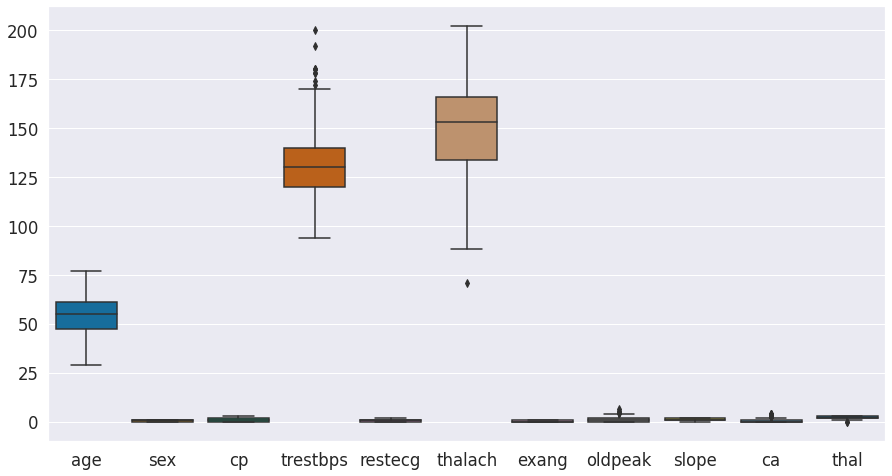

Model: "DNN_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DNN_6_1 (Dense)              (None, 500)               6000      
_________________________________________________________________
DNN_6_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
DNN_6_output (Dense)         (None, 1)                 501       
Total params: 257,001
Trainable params: 257,001
Non-trainable params: 0
_________________________________________________________________
Learning time: 13.98sec
Total loss: 1.8651654720306396
Accuracy: 0.7582417726516724
tn, fp, fn, tp: 26 9 13 43
0.7582417582417583


In [20]:
raw = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

X_data = raw.drop('target', axis=1)
# fbs와 chol 컬럼을 빼야 함
X_data = X_data.drop('fbs', axis=1)
X_data = X_data.drop('chol', axis=1)
INPUT_DIM = 13 - 2

Y_data = raw['target']
names = X_data.columns

show_sample(X_data)

# Z-점수 정규화
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

# numpy -> pandas.dataframe
X_data = pd.DataFrame(X_data, columns=names)

# 훈련 데이터와 테스트 데이터 나누기
# shuffle=True: 섞음
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, 
                                                    train_size=MY_SPLIT, shuffle=True)

model = Sequential(name='DNN_6')
# units 파라미터는 생략 가능
model.add(Dense(name='DNN_6_1', units=MY_HIDDEN, input_dim=INPUT_DIM, activation='tanh'))
model.add(Dense(name='DNN_6_2', units=MY_HIDDEN, activation='tanh'))
model.add(Dense(name='DNN_6_output', units=1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

begin = time()
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, verbose=0)
end = time()
print("Learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Total loss:", score[0])
print("Accuracy:", score[1])

pred = model.predict(X_test)
pred = (pred > 0.5) # 추측값을 이진수로 전환 (Binary이므로)
tn, fp, fn, tp = confusion_matrix(y_true=Y_test, y_pred=pred).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)
print(f1_score(y_true=Y_test, y_pred=pred, average='micro'))

INPUT_DIM = 13 # 원래대로 돌리기

In [21]:
raw = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')
raw = raw.head(100) # 100개만 사용

X_data = raw.drop('target', axis=1)
Y_data = raw['target']
names = X_data.columns

# Z-점수 정규화
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

# numpy -> pandas.dataframe
X_data = pd.DataFrame(X_data, columns=names)

# 훈련 데이터와 테스트 데이터 나누기
# shuffle=True: 섞음
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, 
                                                    train_size=MY_SPLIT, shuffle=True)

#X_train = X_data[:100] # 훈련 데이터 100개만 사용함
#X_test = X_data[100:]
#Y_train = Y_data[:100] # 훈련 데이터 100개만 사용함
#Y_test = Y_data[100:]

print("훈련 데이터 형상:", X_train.shape)
print("훈련 타깃 형상:", Y_train.shape)
print("검증 데이터 형상:", X_test.shape)
print("검증 타깃 형상:", Y_test.shape)

model = Sequential(name='DNN_7')
# units 파라미터는 생략 가능
model.add(Dense(name='DNN_7_1', units=MY_HIDDEN, input_dim=INPUT_DIM, activation='tanh'))
model.add(Dense(name='DNN_7_2', units=MY_HIDDEN, activation='tanh'))
model.add(Dense(name='DNN_7_output', units=1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

begin = time()
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, verbose=0)
end = time()
print("Learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Total loss:", score[0])
print("Accuracy:", score[1])

pred = model.predict(X_test)
pred = (pred > 0.5) # 추측값을 이진수로 전환 (Binary이므로)
print(confusion_matrix(y_true=Y_test, y_pred=pred))
#print("tn, fp, fn, tp:", tn, fp, fn, tp)
print(f1_score(y_true=Y_test, y_pred=pred, average='micro'))

훈련 데이터 형상: (70, 13)
훈련 타깃 형상: (70,)
검증 데이터 형상: (30, 13)
검증 타깃 형상: (30,)
Model: "DNN_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DNN_7_1 (Dense)              (None, 500)               7000      
_________________________________________________________________
DNN_7_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
DNN_7_output (Dense)         (None, 1)                 501       
Total params: 258,001
Trainable params: 258,001
Non-trainable params: 0
_________________________________________________________________
Learning time: 7.09sec
Total loss: 6.770513209630735e-06
Accuracy: 1.0
[[30]]
1.0


* 처음 100명의 환자들이 모두 심장병이었으므로, 점수가 1이 나옴

In [22]:
raw

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


* 섞어야 함!

In [23]:
raw = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')
#raw = raw.head(100) # 100개만 사용
raw = raw.sample(frac=100 / raw.shape[0])
print(raw.shape)

X_data = raw.drop('target', axis=1)
Y_data = raw['target']
names = X_data.columns

# Z-점수 정규화
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

# numpy -> pandas.dataframe
X_data = pd.DataFrame(X_data, columns=names)

# 훈련 데이터와 테스트 데이터 나누기
# shuffle=True: 섞음
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, 
                                                    train_size=MY_SPLIT, shuffle=True)

#X_train = X_data[:100] # 훈련 데이터 100개만 사용함
#X_test = X_data[100:]
#Y_train = Y_data[:100] # 훈련 데이터 100개만 사용함
#Y_test = Y_data[100:]

print("훈련 데이터 형상:", X_train.shape)
print("훈련 타깃 형상:", Y_train.shape)
print("검증 데이터 형상:", X_test.shape)
print("검증 타깃 형상:", Y_test.shape)

model = Sequential(name='DNN_7')
# units 파라미터는 생략 가능
model.add(Dense(name='DNN_7_1', units=MY_HIDDEN, input_dim=INPUT_DIM, activation='tanh'))
model.add(Dense(name='DNN_7_2', units=MY_HIDDEN, activation='tanh'))
model.add(Dense(name='DNN_7_output', units=1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

begin = time()
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, verbose=0)
end = time()
print("Learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Total loss:", score[0])
print("Accuracy:", score[1])

pred = model.predict(X_test)
pred = (pred > 0.5) # 추측값을 이진수로 전환 (Binary이므로)
print(confusion_matrix(y_true=Y_test, y_pred=pred))
#print("tn, fp, fn, tp:", tn, fp, fn, tp)
print(f1_score(y_true=Y_test, y_pred=pred, average='micro'))

(100, 14)
훈련 데이터 형상: (70, 13)
훈련 타깃 형상: (70,)
검증 데이터 형상: (30, 13)
검증 타깃 형상: (30,)
Model: "DNN_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DNN_7_1 (Dense)              (None, 500)               7000      
_________________________________________________________________
DNN_7_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
DNN_7_output (Dense)         (None, 1)                 501       
Total params: 258,001
Trainable params: 258,001
Non-trainable params: 0
_________________________________________________________________
Learning time: 7.43sec
Total loss: 1.6803416013717651
Accuracy: 0.699999988079071
[[ 9  5]
 [ 4 12]]
0.7
